In [1]:
import numpy as np
import pints
import pints.plot
import pints_smol_moments_6_normalised_jit_surface_area_pro as toy
import matplotlib.pyplot as plt
from scipy.stats import moment
import pandas as pd



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [2]:

model = toy.SmolModel(None,None)


true_parameters = [0.0003, 0.01, 900]


times = np.linspace(20, 90, 71)

df = pd.read_csv('2017-03-16_inference_input_multi_well_t_20.csv', header=None)
org_values = np.transpose(df.to_numpy())
org_values = org_values[:71,:]


# 1st moment is mean, 1st centred moment should be array 6
centred_moment_1 = moment(org_values, moment=1, axis=1)
centred_moment_2 = moment(org_values, moment=2, axis=1)
centred_moment_3 = moment(org_values, moment=3, axis=1)
centred_moment_4 = moment(org_values, moment=4, axis=1)
centred_moment_5 = moment(org_values, moment=5, axis=1)
centred_moment_6 = moment(org_values, moment=6, axis=1)

# Out array, mean, variance then centred standardised moments (aka skewness, kurtosis, hyperskewness)
st_dev = np.sqrt(centred_moment_2)
out_array = np.zeros((71,6))
out_array[:,0] = np.mean(org_values,axis=1)
out_array[:,1] = centred_moment_2
out_array[:,2] = np.divide(centred_moment_3,st_dev*st_dev*st_dev)
out_array[:,3] = np.divide(centred_moment_4,st_dev*st_dev*st_dev*st_dev)
out_array[:,4] = np.divide(centred_moment_5,st_dev*st_dev*st_dev*st_dev*st_dev)
out_array[:,5] = np.divide(centred_moment_6,st_dev*st_dev*st_dev*st_dev*st_dev*st_dev)

Add noise to the data (using random sampling from normal distribution)

In [3]:
size_noise = 6
noise_value = 1
# # Create a list with the specified size filled with a placeholder value
noise_arr = [noise_value for _ in range(size_noise)]

Set-up pints problem and log likelihoods

In [4]:

# problem = pints.MultiOutputProblem(model, times, centred_moments)
print(model)
problem = pints.MultiOutputProblem(model, times, out_array)

log_likelihood = pints.GaussianLogLikelihood(problem)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood.n_parameters()))
# print('New dimension: ' + str(log_likelihood_2.n_parameters()))

true_parameters += noise_arr
# print(true_parameters)



Original problem dimension: 3
New dimension: 9


Create uniform log prior

In [5]:

# Define the size of the list
size = 9
placeholder_lower_value = 0
placeholder_upper_value = 100
 
# Create a list with the specified size filled with a placeholder value
prior_arr_lower = [placeholder_lower_value for _ in range(size)]
prior_arr_upper = [placeholder_upper_value for _ in range(size)]
prior_arr_lower[0] = 0.00001
prior_arr_upper[0] = 0.001
prior_arr_lower[1] = 0.00001
prior_arr_upper[1] = 0.1
prior_arr_lower[2] = 1
prior_arr_upper[2] = 4000



log_prior = pints.UniformLogPrior(
    prior_arr_lower,
    prior_arr_upper
    )

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_23984/1507882153.py:18: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


In [6]:

xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 1000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)



Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.5
1     660     0:10.6
2     1323    0:13.3
3     1926    0:16.5
 lsoda--  at t(=r1) and step size h(=r2), the error  
       test failed repeatedly or with abs(h) = hmin  
      in above,  r1 =  0.4137380960692D+02   r2 =  0.1068780676777D-10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Repeated error test failures (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


20    11562   0:56.0
40    21639   1:29.5
 lsoda--  at t(=r1) and step size h(=r2), the error  
       test failed repeatedly or with abs(h) = hmin  
      in above,  r1 =  0.8132316364512D+02   r2 =  0.2260080906842D-13
60    30081   2:03.0
80    38226   2:33.0
100   45990   2:59.8
120   54267   3:34.0
140   61959   3:59.5
160   69921   4:25.1
180   77733   4:51.7
200   85026   5:14.6
220   92631   5:38.7
240   100296   6:07.7
260   108426   6:33.4
280   115914   6:57.3
300   123699   7:22.6
320   131319   7:46.7
340   139005   8:10.8
360   146850   8:35.8
380   154602   9:00.1
400   162426   9:24.6
420   170253   9:49.5
440   177930  10:13.2
 lsoda--  at t(=r1) and step size h(=r2), the error  
       test failed repeatedly or with abs(h) = hmin  
      in above,  r1 =  0.6188995270873D+02   r2 =  0.2796355021133D-10
460   185757  10:37.9
480   193530  11:01.8
500   201378  11:29.1
520   209121  11:52.9
540   216999  12:17.8
560   225054  12:43.0
580   232758  13:06.3
600   240555  1

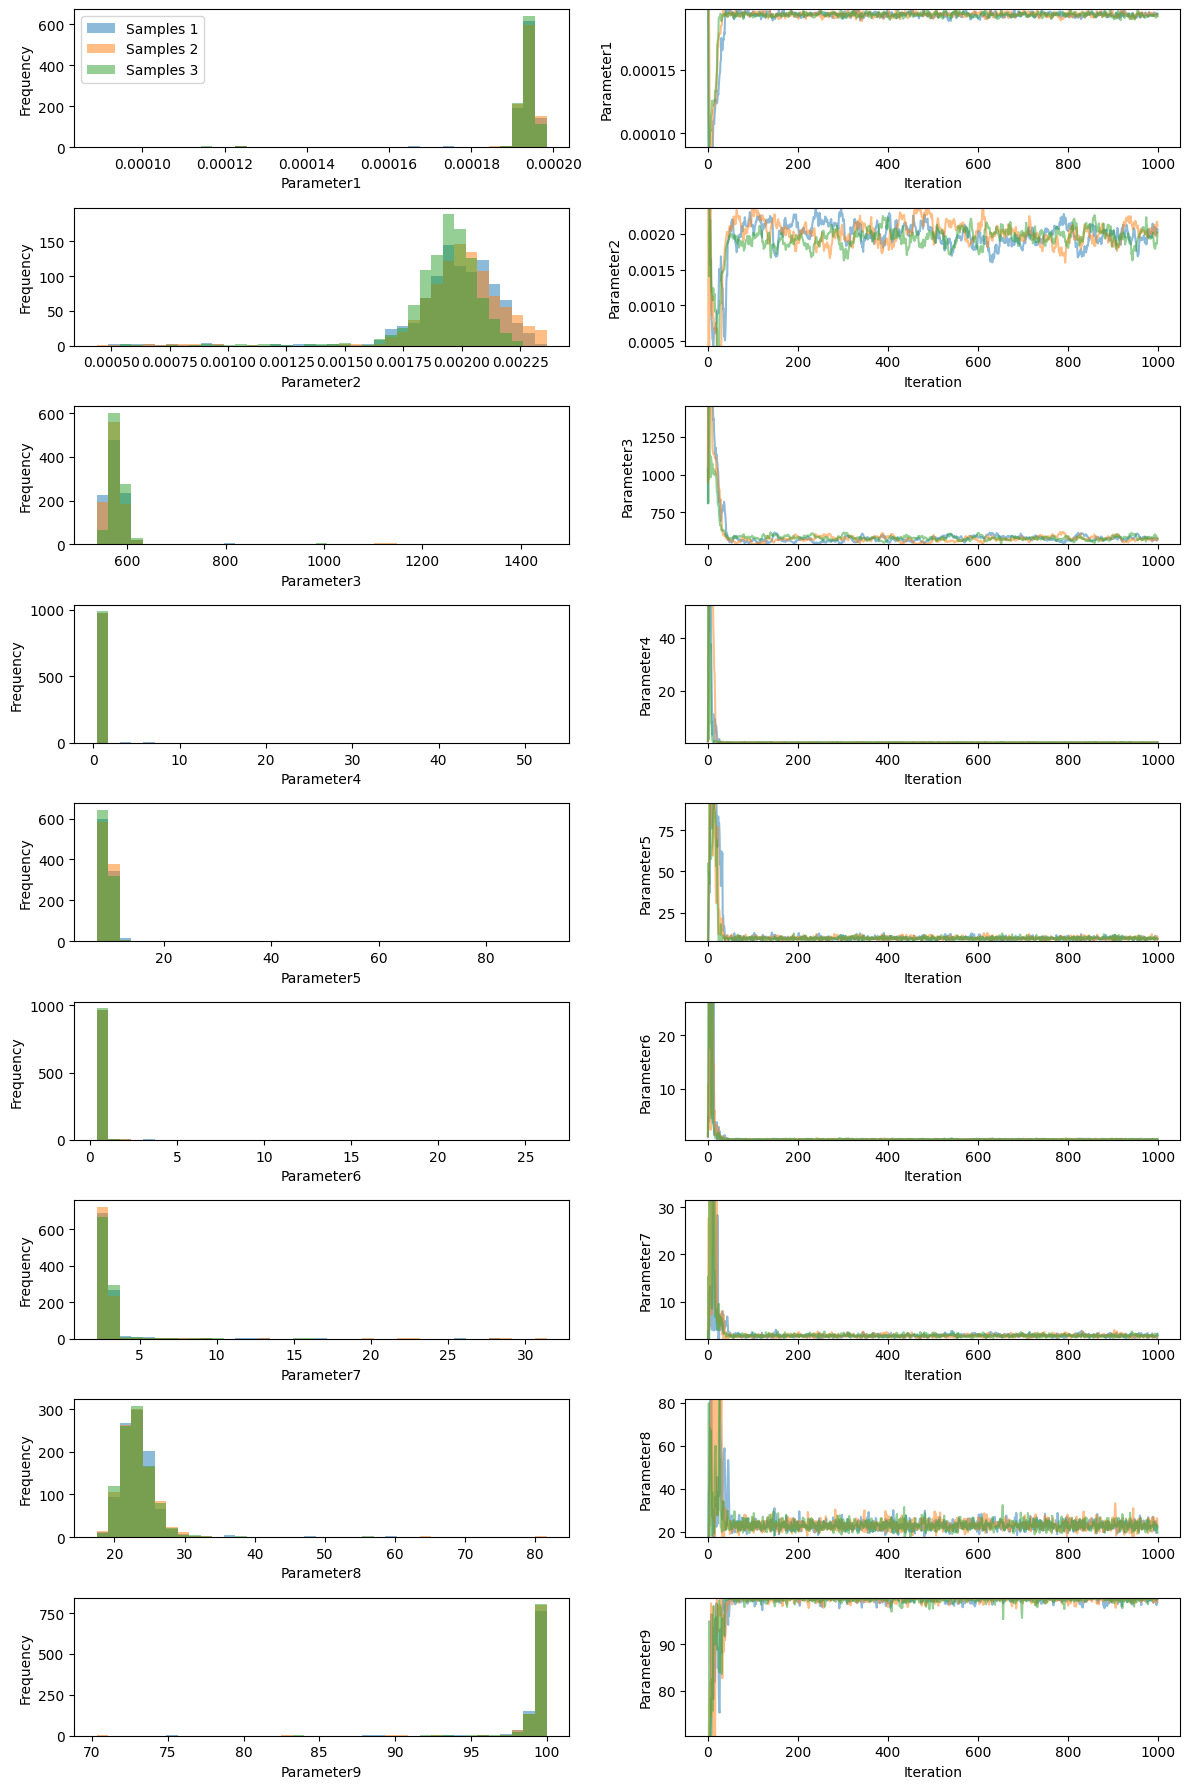

In [7]:

pints.plot.trace(chains, n_percentiles=99)
plt.savefig("mcmc.png")
plt.show()


In [8]:

# ITERS = 100
AllChains = chains[0,100:10000,:]
# np.asarray(AllChains)
print(np.shape(AllChains))
print(AllChains[0])
print(AllChains)


(900, 9)
[1.96412377e-04 2.11988463e-03 5.61941184e+02 5.31089410e-01
 1.10771550e+01 5.11459757e-01 2.97515447e+00 2.13630916e+01
 9.98323067e+01]
[[1.96412377e-04 2.11988463e-03 5.61941184e+02 ... 2.97515447e+00
  2.13630916e+01 9.98323067e+01]
 [1.93695323e-04 2.02520247e-03 5.64412833e+02 ... 2.84094771e+00
  2.36349311e+01 9.99773932e+01]
 [1.95967855e-04 1.97489340e-03 5.73216609e+02 ... 2.44854648e+00
  2.44443102e+01 9.97057270e+01]
 ...
 [1.94715888e-04 2.07286255e-03 5.62875103e+02 ... 2.79073574e+00
  2.26834339e+01 9.84019917e+01]
 [1.94562631e-04 2.02595696e-03 5.72213636e+02 ... 2.30818043e+00
  2.24841743e+01 9.98888896e+01]
 [1.94441289e-04 2.05575834e-03 5.68330854e+02 ... 3.26693933e+00
  2.19402160e+01 9.97296992e+01]]


In [9]:

for I in range(3-1):
    AllChains_add = chains[I+1,100:10000,:]
    AllChains = np.concatenate((AllChains,AllChains_add), axis=0)


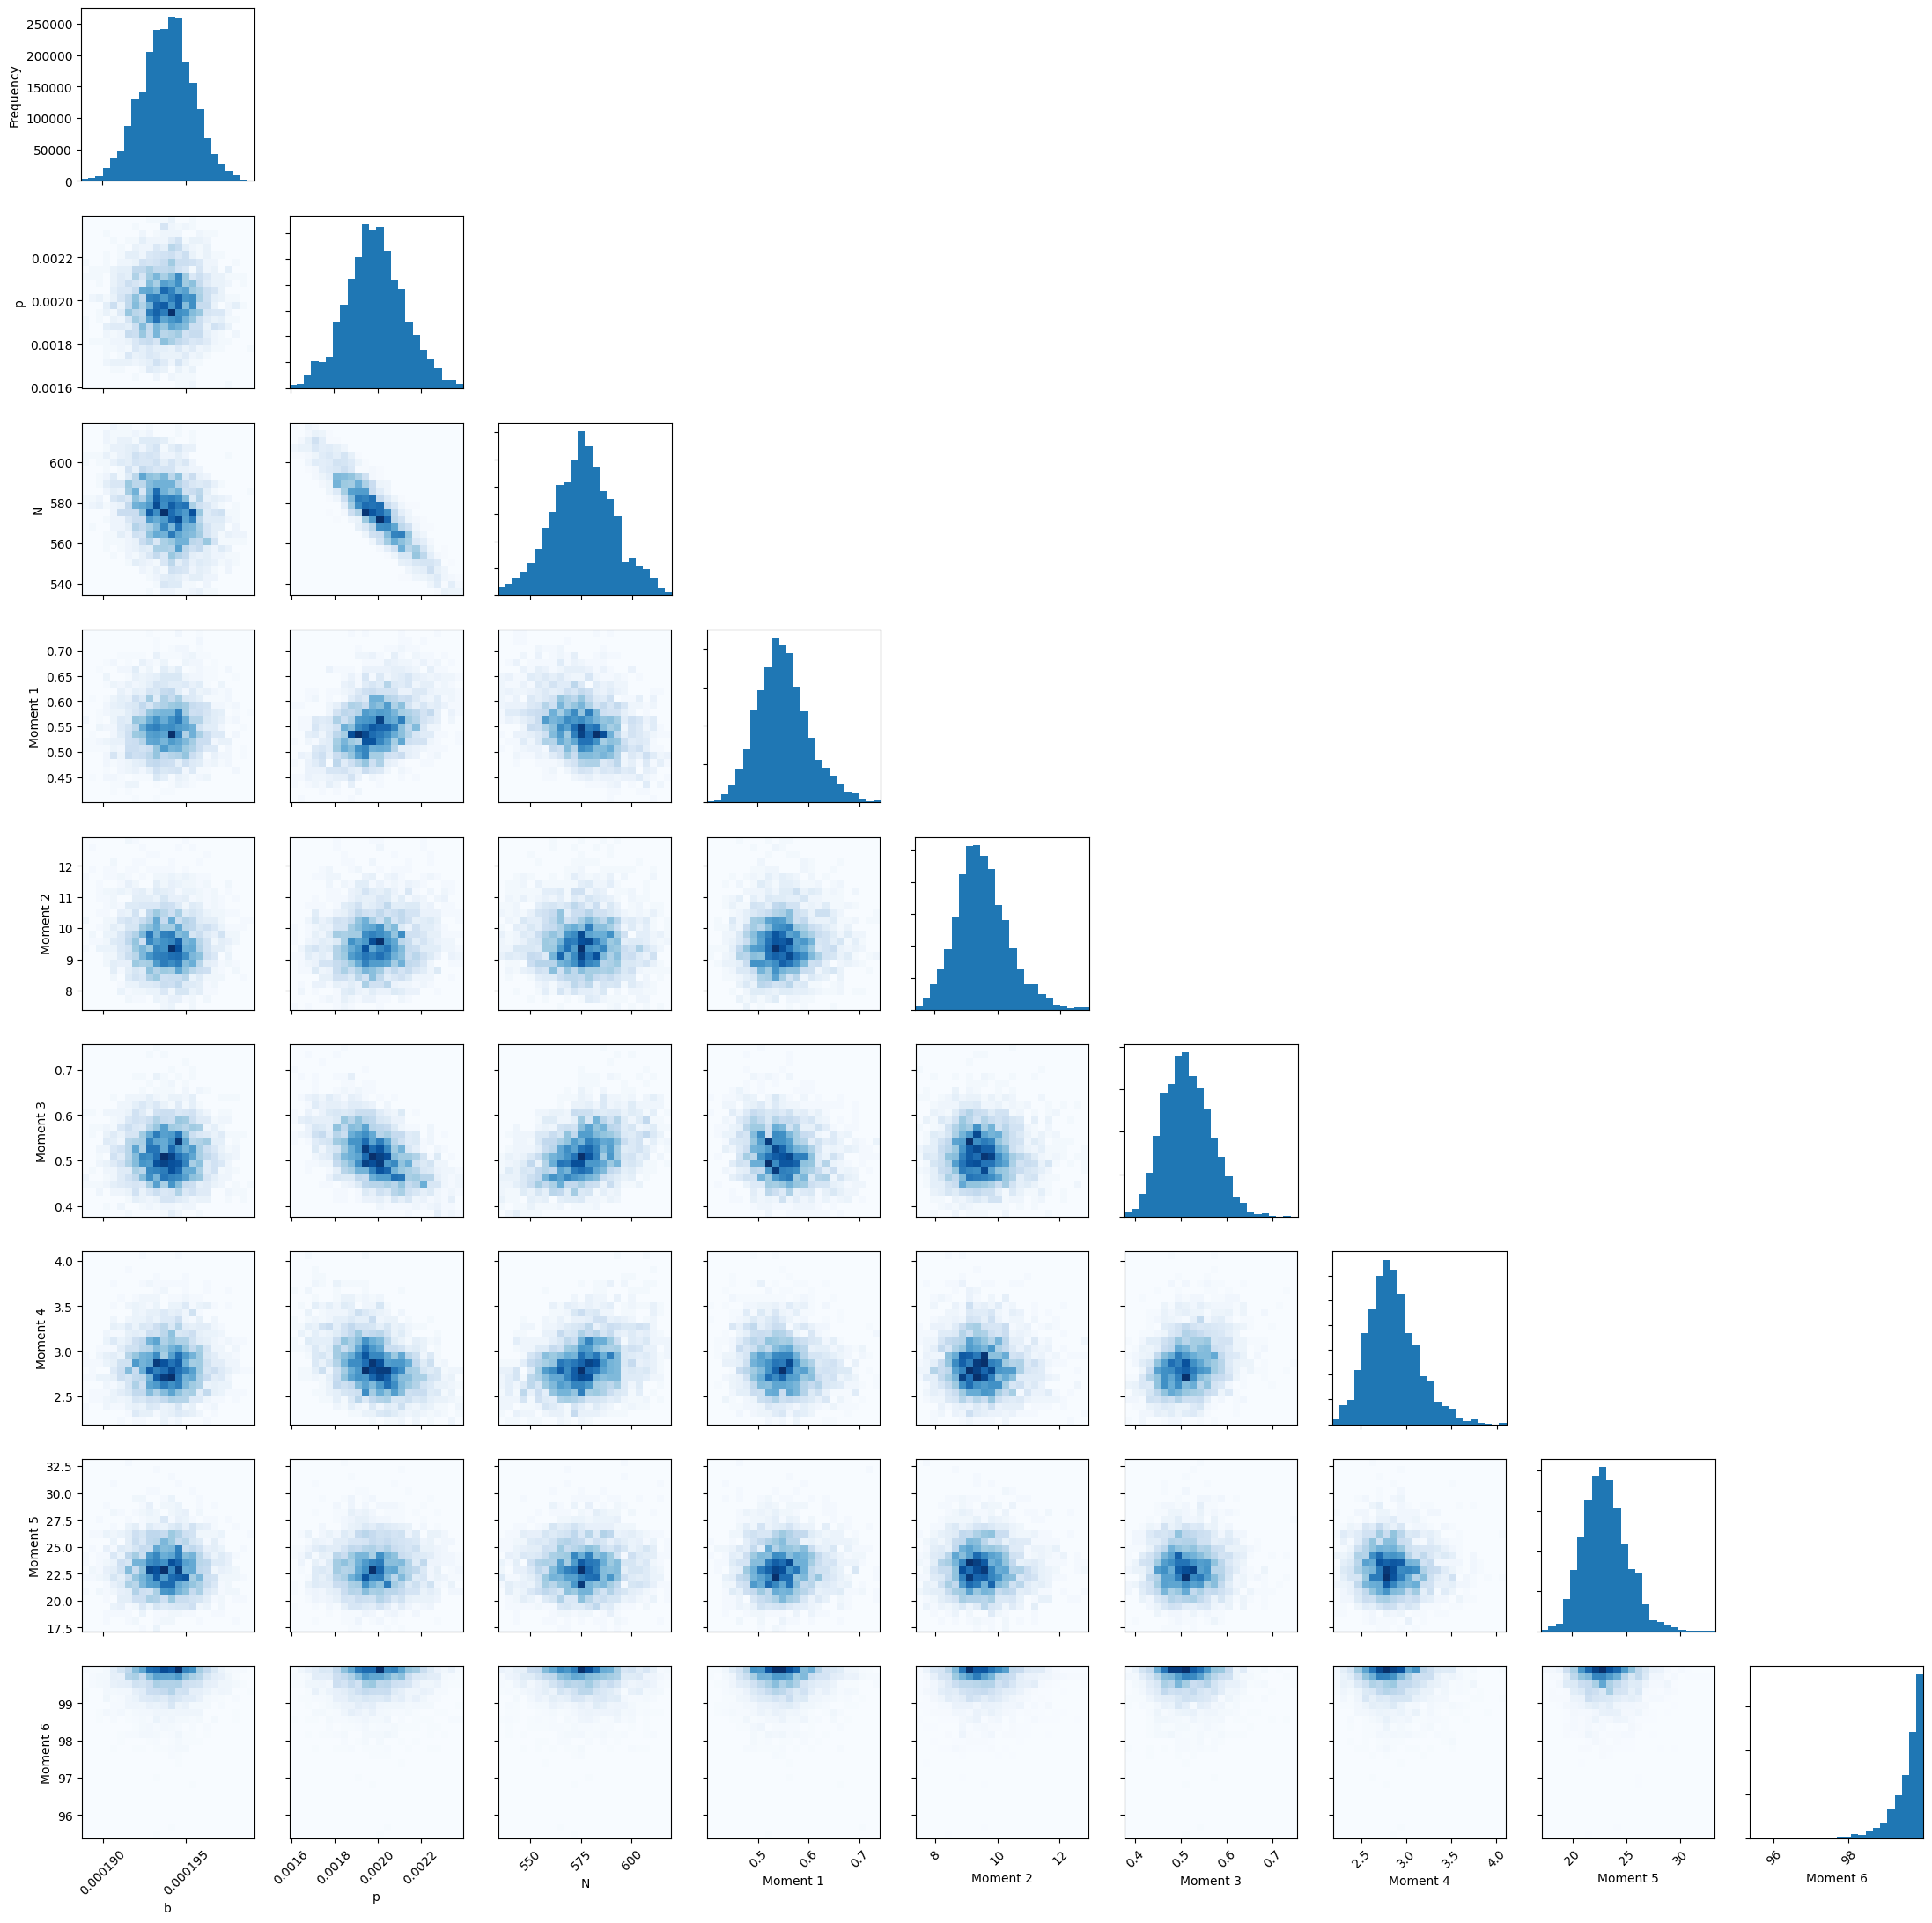

In [11]:


parameter_names = ["b","p", "N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5", "Moment 6"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","p", "N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5", "Moment 6"])
plt.show()

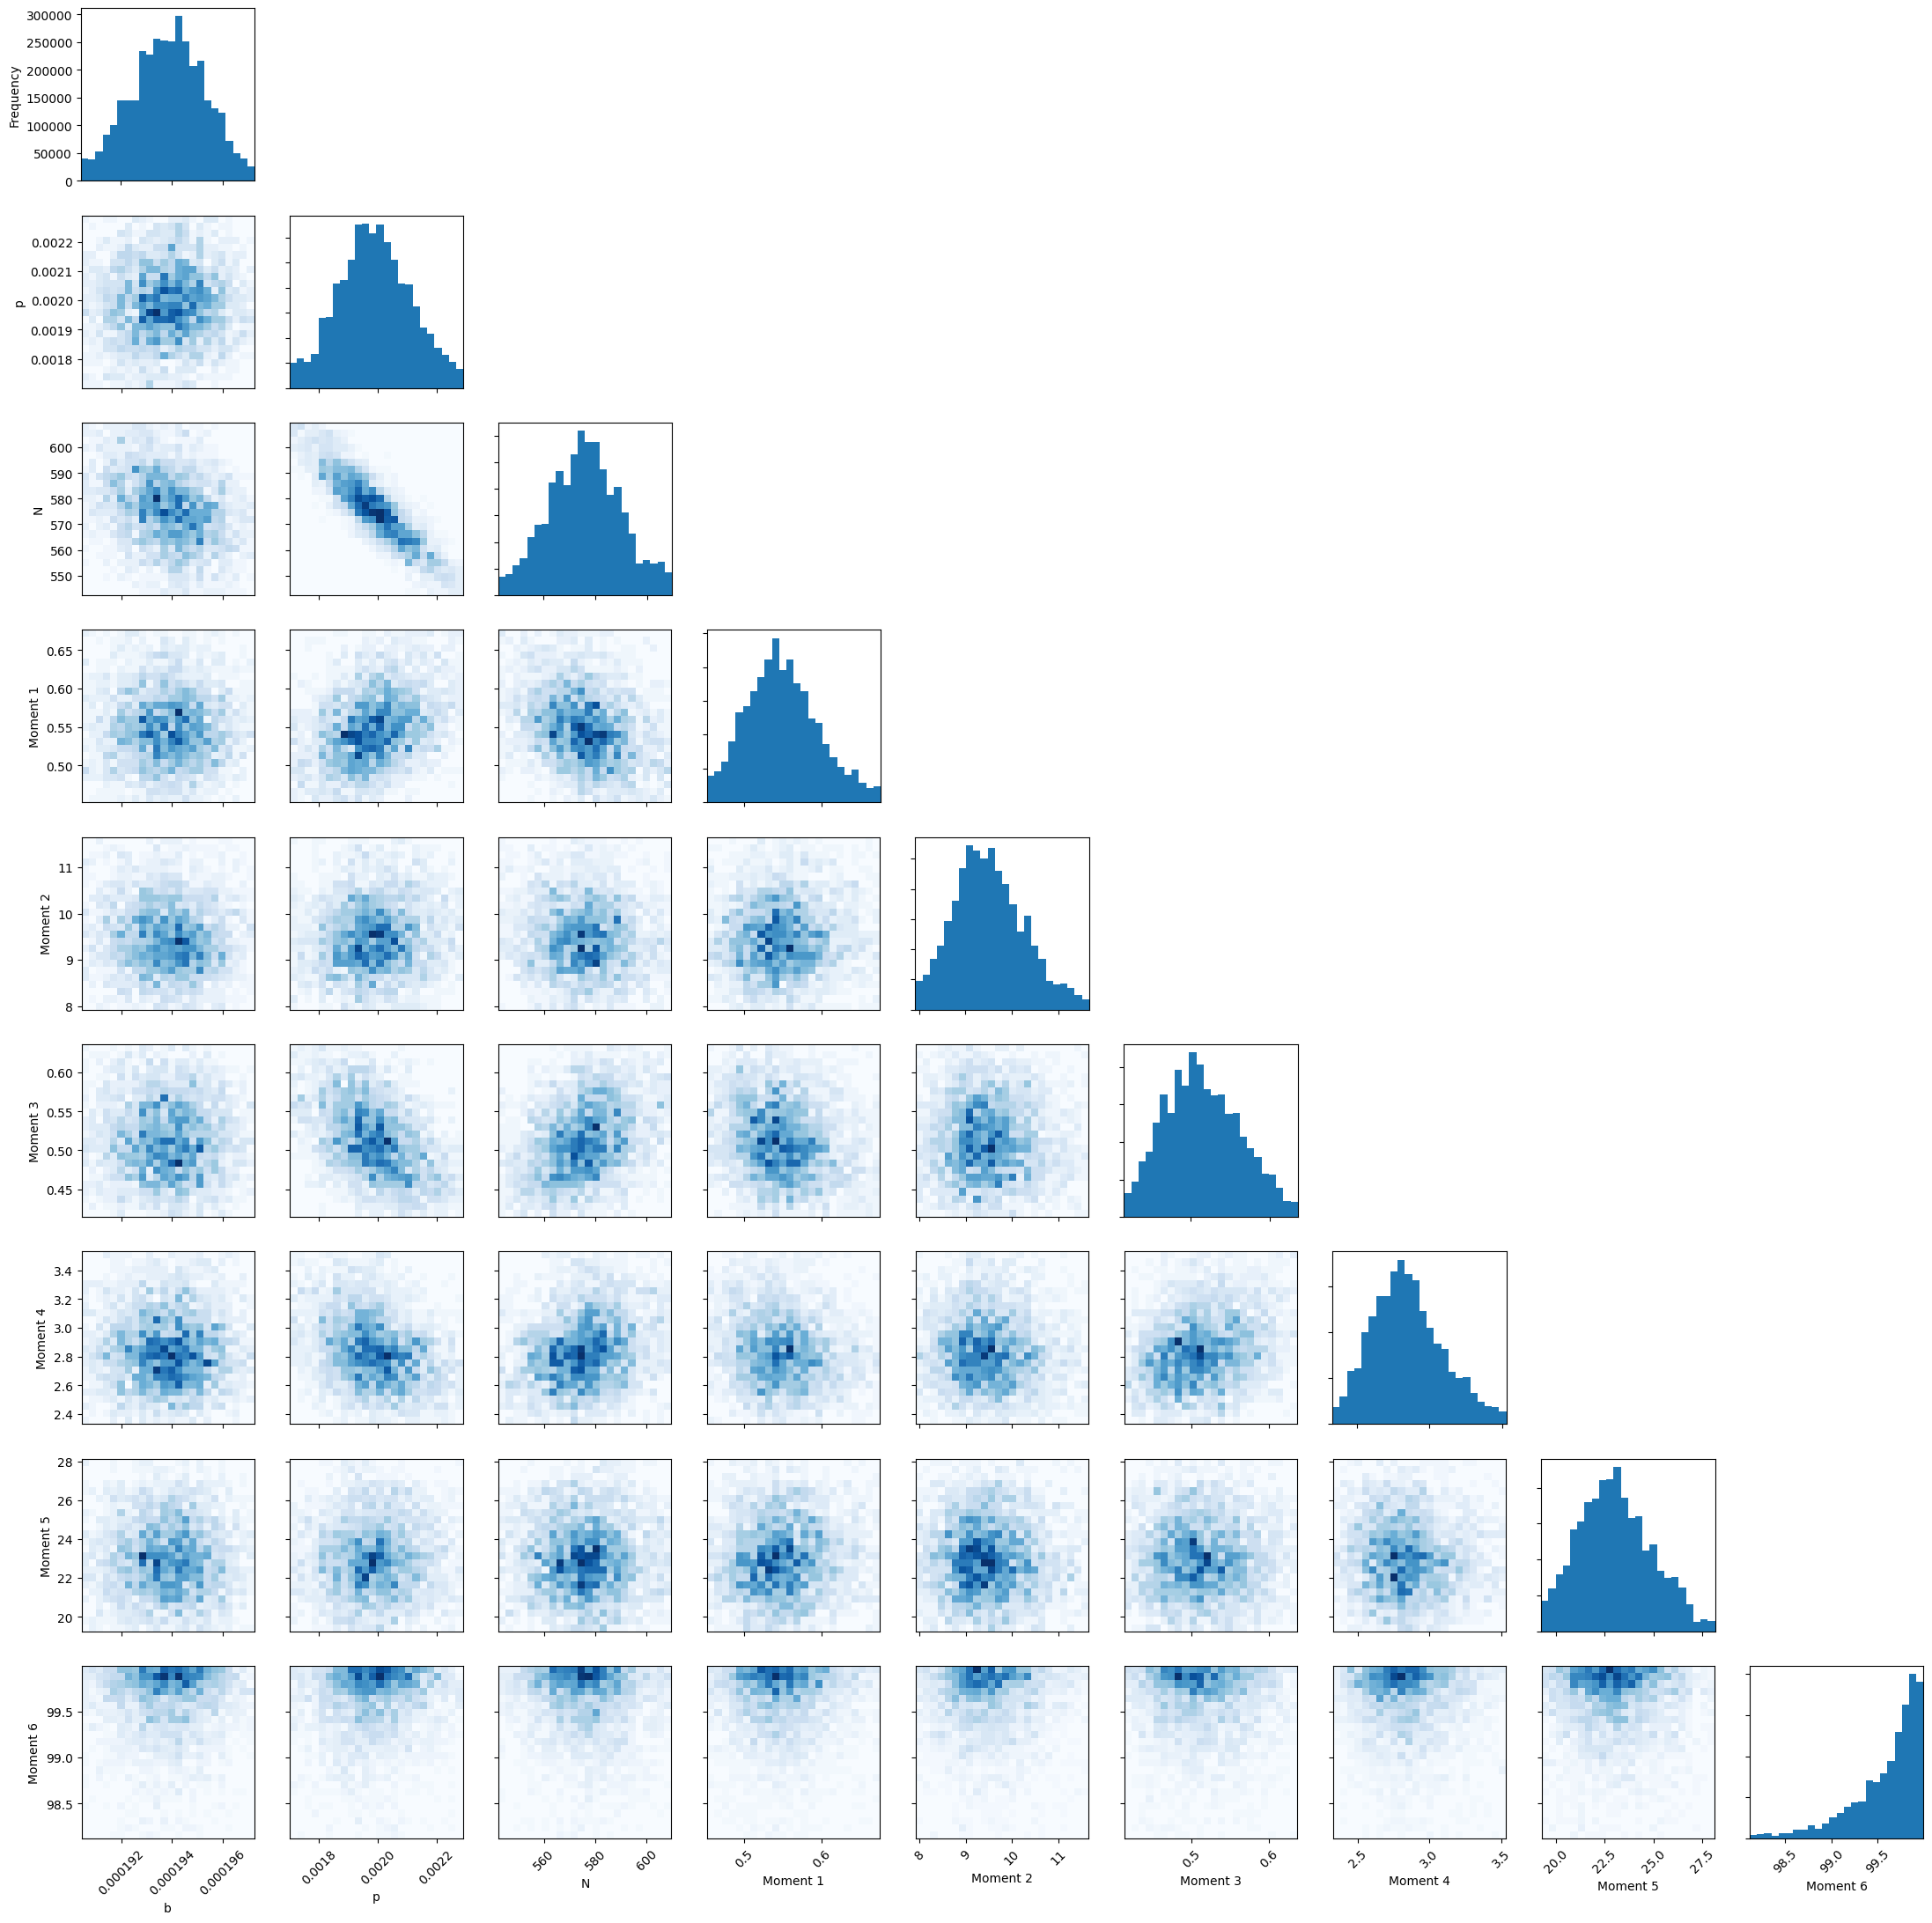

In [12]:
parameter_names = ["b","p","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5", "Moment 6"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","p","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5", "Moment 6"],
                    n_percentiles=97)
                    
plt.show()

In [13]:
parameter_names = ["b","p","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5", "Moment 6"]
results = pints.MCMCSummary(chains=chains[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)


<class 'pints._mcmc._summary.MCMCSummary'>
param     mean    std.    2.5%    25%     50%     75%     97.5%    rhat    ess     ess per sec.
--------  ------  ------  ------  ------  ------  ------  -------  ------  ------  --------------
b         0.00    0.00    0.00    0.00    0.00    0.00    0.00     1.01    261.21  0.20
p         0.00    0.00    0.00    0.00    0.00    0.00    0.00     1.06    76.02   0.06
N         578.06  13.54   554.92  568.67  576.90  586.97  607.64   1.07    74.96   0.06
Moment 1  0.55    0.05    0.46    0.51    0.54    0.57    0.66     1.00    386.69  0.30
Moment 2  9.50    0.80    8.01    8.98    9.45    9.98    11.30    1.00    450.48  0.35
Moment 3  0.52    0.05    0.43    0.48    0.51    0.55    0.62     1.02    205.23  0.16
Moment 4  2.87    0.27    2.41    2.68    2.84    3.03    3.45     1.01    287.83  0.22
Moment 5  23.12   2.01    19.50   21.72   22.98   24.37   27.14    1.00    460.63  0.36
Moment 6  99.57   0.44    98.41   99.40   99.71   99.88   9

In [14]:
from tabulate import tabulate
class MyMCMCSummary(pints.MCMCSummary):
    def __str__(self):
        """
        Prints posterior summaries for all parameters to the console, including
        the parameter name, posterior mean, posterior std deviation, the
        2.5%, 25%, 50%, 75% and 97.5% posterior quantiles, rhat, effective
        sample size (ess) and ess per second of run time.
        """
        if self._summary_str is None:
            headers = [
                'param', 'mean', 'std.',
                '2.5%', '25%', '50%', '75%', '97.5%',
                'rhat', 'ess']
            if self._time is not None:
                headers.append('ess per sec.')

            self._summary_str = tabulate(
                self._summary_list,
                headers=headers,
                numalign='left',
                floatfmt='.3g',
            )

        return self._summary_str
    


In [15]:

parameter_names = ["b","p","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5", "Moment 6"]
results = MyMCMCSummary(chains=chains[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

<class '__main__.MyMCMCSummary'>
param     mean      std.      2.5%      25%       50%       75%       97.5%     rhat    ess    ess per sec.
--------  --------  --------  --------  --------  --------  --------  --------  ------  -----  --------------
b         0.000194  1.56e-06  0.000191  0.000193  0.000194  0.000195  0.000197  1.01    261    0.202
p         0.00197   0.000118  0.00171   0.0019    0.00197   0.00205   0.00219   1.06    76     0.0587
N         578       13.5      555       569       577       587       608       1.07    75     0.0579
Moment 1  0.546     0.0498    0.457     0.512     0.542     0.574     0.658     1       387    0.299
Moment 2  9.5       0.804     8.01      8.98      9.45      9.98      11.3      1       450    0.348
Moment 3  0.519     0.0505    0.43      0.483     0.515     0.553     0.622     1.02    205    0.159
Moment 4  2.87      0.267     2.41      2.68      2.84      3.03      3.45      1.01    288    0.222
Moment 5  23.1      2.01      19.5      

In [16]:
import math
print(math.log(4))
results.mean()

print(len(results.mean()))

AIC = 2*len(results.mean()) - 2*log_likelihood(results.mean())

print(AIC)


BIC = len(results.mean())*math.log(4) - 2*log_likelihood(results.mean())

print(BIC)

1.3862943611198906
9
2816.6917265416914
2811.1683757917704


In [17]:
shape_chains = np.shape(AllChains)

DIC_1 = 0
for i in range(shape_chains[0]):
    thetas = AllChains[i,:]
    DIC_1 += -2*log_likelihood(thetas)

DIC_1 = DIC_1/shape_chains[0]

DIC_2 = -2*log_likelihood(results.mean())

DIC = 2*DIC_1 - DIC_2

print(DIC)

2814.672277101741


In [ ]:
import scipy as spy

KS_test_array = []
for i in range(71):
    KS_test = spy.stats.kstest(result_interested[i,:], org_values[i,:])
    KS_test_array = np.append(KS_test_array, KS_test.statistic)

plt.plot(KS_test_array)

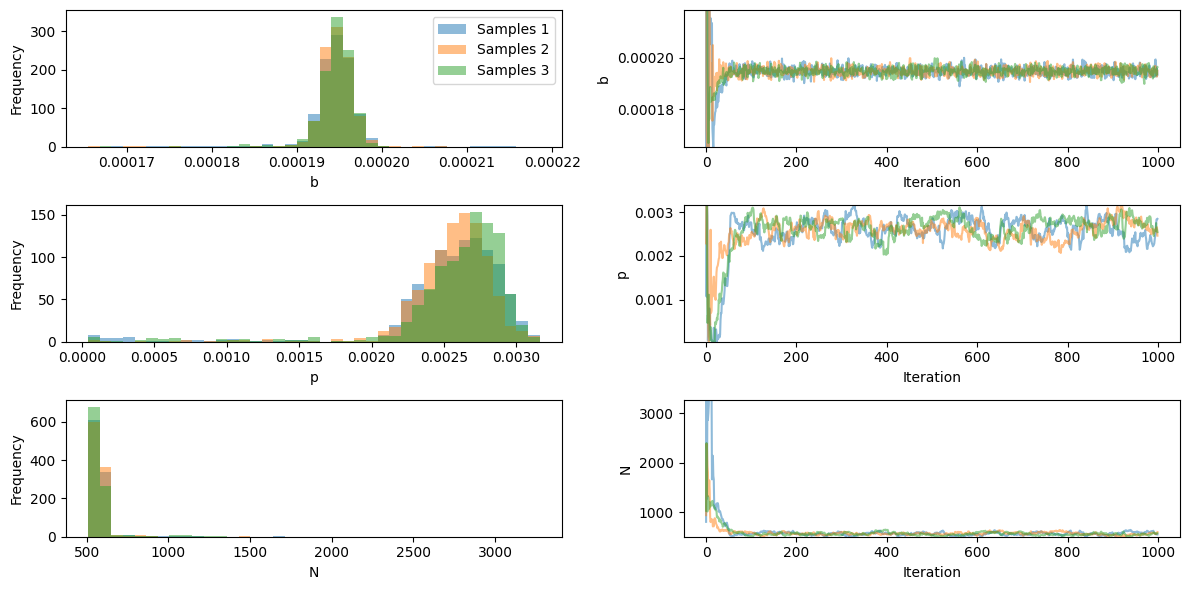

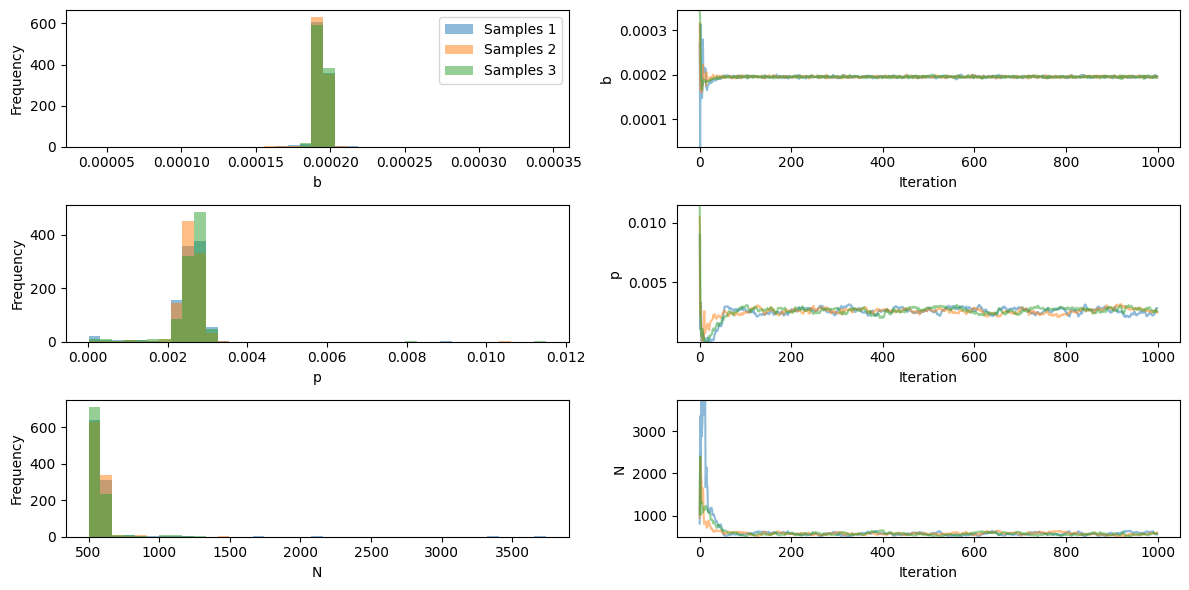

In [ ]:
pints.plot.trace(chains[:,:,[0,1,2]], n_percentiles=99.5, parameter_names=["b","p","N"])
plt.savefig("pints_out_extremes_removed.png", dpi=300)
plt.show()
pints.plot.trace(chains[:,:,[0,1,2]], parameter_names=["b","p","N"])
plt.savefig("pints_out.png", dpi=300)
plt.show()